<ipython-input-4-d34b61483e4d>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_ghi.index, y=seasonal_ghi.values, palette='coolwarm')


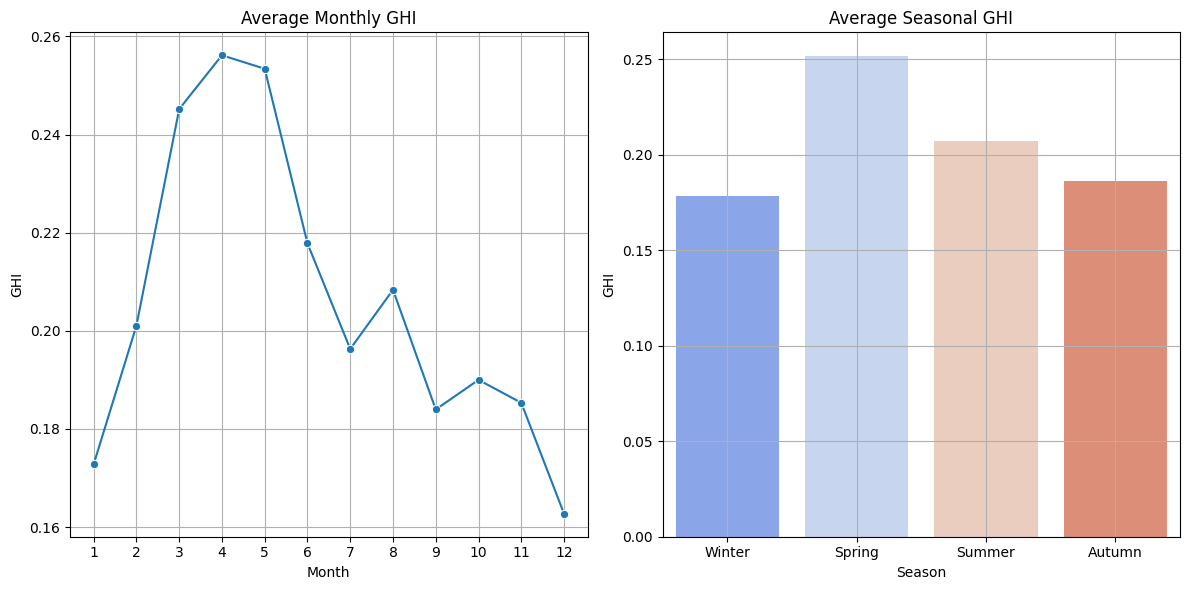

Monthly and Seasonal GHI data saved.


In [4]:
# Install necessary libraries (if not already installed)
!pip install -U -q PyDrive

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create a PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Find the file in your Google Drive
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()  # Use GetList() to get the list of files
for file1 in file_list:
  if file1['title'] == 'Total_Combine_Dataset.csv':
    file_id = file1['id']
    break

# Download the file content
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Total_Combine_Dataset.csv')

# Load the file into a DataFrame
df = pd.read_csv('Total_Combine_Dataset.csv')

# Step 2: Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M', errors='coerce')

# Step 3: Add new columns for Month and Season
df['Month'] = df['DateTime'].dt.month
df['Season'] = df['Month'].apply(lambda x: (
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Autumn'
))

# Step 4: Group data by Month and Season, calculate mean GHI
monthly_ghi = df.groupby('Month')['GHI'].mean()
seasonal_ghi = df.groupby('Season')['GHI'].mean()

# Sort by custom season order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_ghi = seasonal_ghi.reindex(season_order)

# Step 5: Visualize the patterns
plt.figure(figsize=(12, 6))

# Monthly GHI plot
plt.subplot(1, 2, 1)
sns.lineplot(x=monthly_ghi.index, y=monthly_ghi.values, marker='o')
plt.title('Average Monthly GHI')
plt.xlabel('Month')
plt.ylabel('GHI')
plt.xticks(range(1, 13))
plt.grid()

# Seasonal GHI plot
plt.subplot(1, 2, 2)
sns.barplot(x=seasonal_ghi.index, y=seasonal_ghi.values, palette='coolwarm')
plt.title('Average Seasonal GHI')
plt.xlabel('Season')
plt.ylabel('GHI')
plt.grid()

plt.tight_layout()
plt.show()

# Step 6: Save aggregated data for further use
monthly_ghi.to_csv("Monthly_GHI.csv")
seasonal_ghi.to_csv("Seasonal_GHI.csv")
# Download the files (if needed - you might already have them in your Drive)
#from google.colab import files
#files.download("Monthly_GHI.csv")
#files.download("Seasonal_GHI.csv")

print("Monthly and Seasonal GHI data saved.")

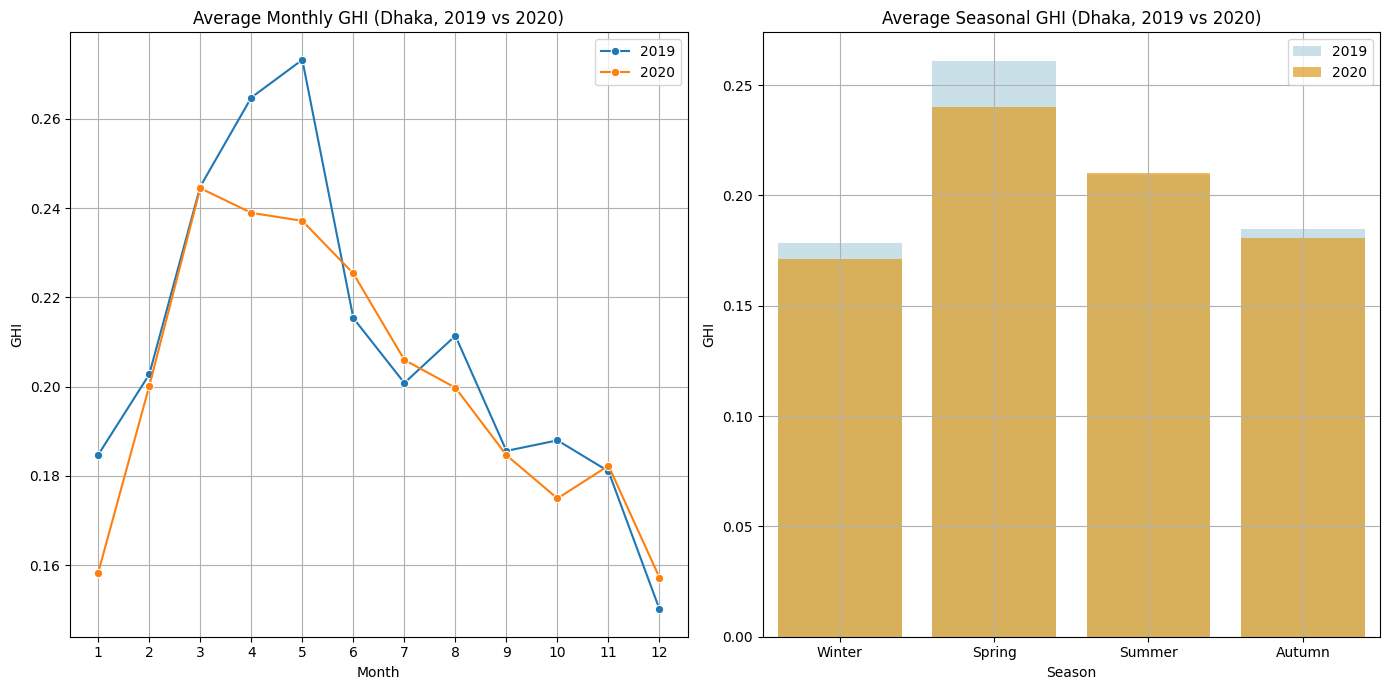

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Combined City-Year Monthly and Seasonal GHI data saved and downloaded.


In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load your combined dataset
# Replace 'Total_Combine_Dataset.csv' with the name of your file
df = pd.read_csv('Total_Combine_Dataset.csv')

# Step 3: Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M', errors='coerce')

# Step 4: Add Year, Month, and Season columns
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Season'] = df['Month'].apply(lambda x: (
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Autumn'
))

# Step 5: Group data by City, Year, Month, and Season to calculate GHI patterns
# Monthly GHI
city_year_monthly_ghi = df.groupby(['City', 'Year', 'Month'])['GHI'].mean().unstack(level=2)

# Seasonal GHI
city_year_seasonal_ghi = df.groupby(['City', 'Year', 'Season'])['GHI'].mean().unstack(level=2)

# Sort seasons in custom order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
city_year_seasonal_ghi = city_year_seasonal_ghi[season_order]

# Step 6: Save aggregated data to CSV files
city_year_monthly_ghi.to_csv("Combined_City_Year_Monthly_GHI.csv")
city_year_seasonal_ghi.to_csv("Combined_City_Year_Seasonal_GHI.csv")

# Step 7: Visualize data for a specific city across both years
example_city = 'Dhaka'  # Replace with a city name
year_2019 = city_year_monthly_ghi.loc[example_city, 2019]
year_2020 = city_year_monthly_ghi.loc[example_city, 2020]

plt.figure(figsize=(14, 7))

# Monthly GHI plot for 2019 and 2020
plt.subplot(1, 2, 1)
sns.lineplot(x=year_2019.index, y=year_2019.values, marker='o', label='2019')
sns.lineplot(x=year_2020.index, y=year_2020.values, marker='o', label='2020')
plt.title(f'Average Monthly GHI ({example_city}, 2019 vs 2020)')
plt.xlabel('Month')
plt.ylabel('GHI')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()

# Seasonal GHI plot for 2019 and 2020
year_2019_season = city_year_seasonal_ghi.loc[example_city, 2019]
year_2020_season = city_year_seasonal_ghi.loc[example_city, 2020]

plt.subplot(1, 2, 2)
sns.barplot(x=year_2019_season.index, y=year_2019_season.values, label='2019', color='lightblue', alpha=0.7)
sns.barplot(x=year_2020_season.index, y=year_2020_season.values, label='2020', color='orange', alpha=0.7)
plt.title(f'Average Seasonal GHI ({example_city}, 2019 vs 2020)')
plt.xlabel('Season')
plt.ylabel('GHI')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Download the files (if needed)
from google.colab import files
files.download("Combined_City_Year_Monthly_GHI.csv")
files.download("Combined_City_Year_Seasonal_GHI.csv")

print("Combined City-Year Monthly and Seasonal GHI data saved and downloaded.")


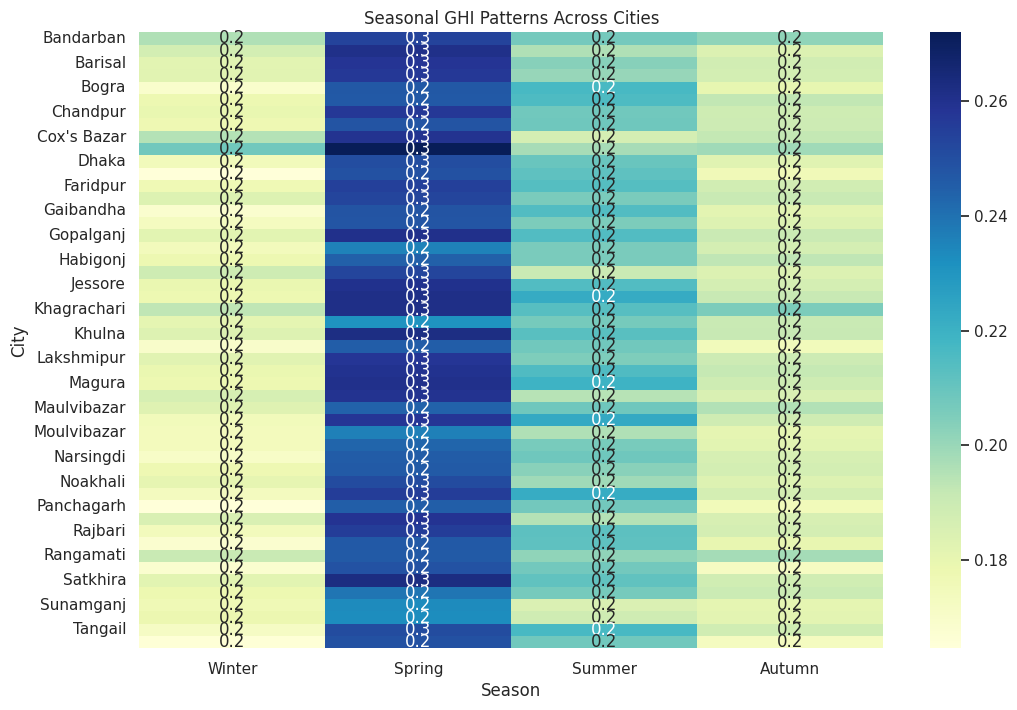

In [15]:
# Pivot table for City and Season with average GHI
heatmap_data = df.groupby(['City', 'Season'])['GHI'].mean().unstack()

# Sort season order
heatmap_data = heatmap_data[season_order]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Seasonal GHI Patterns Across Cities')
plt.xlabel('Season')
plt.ylabel('City')
plt.show()


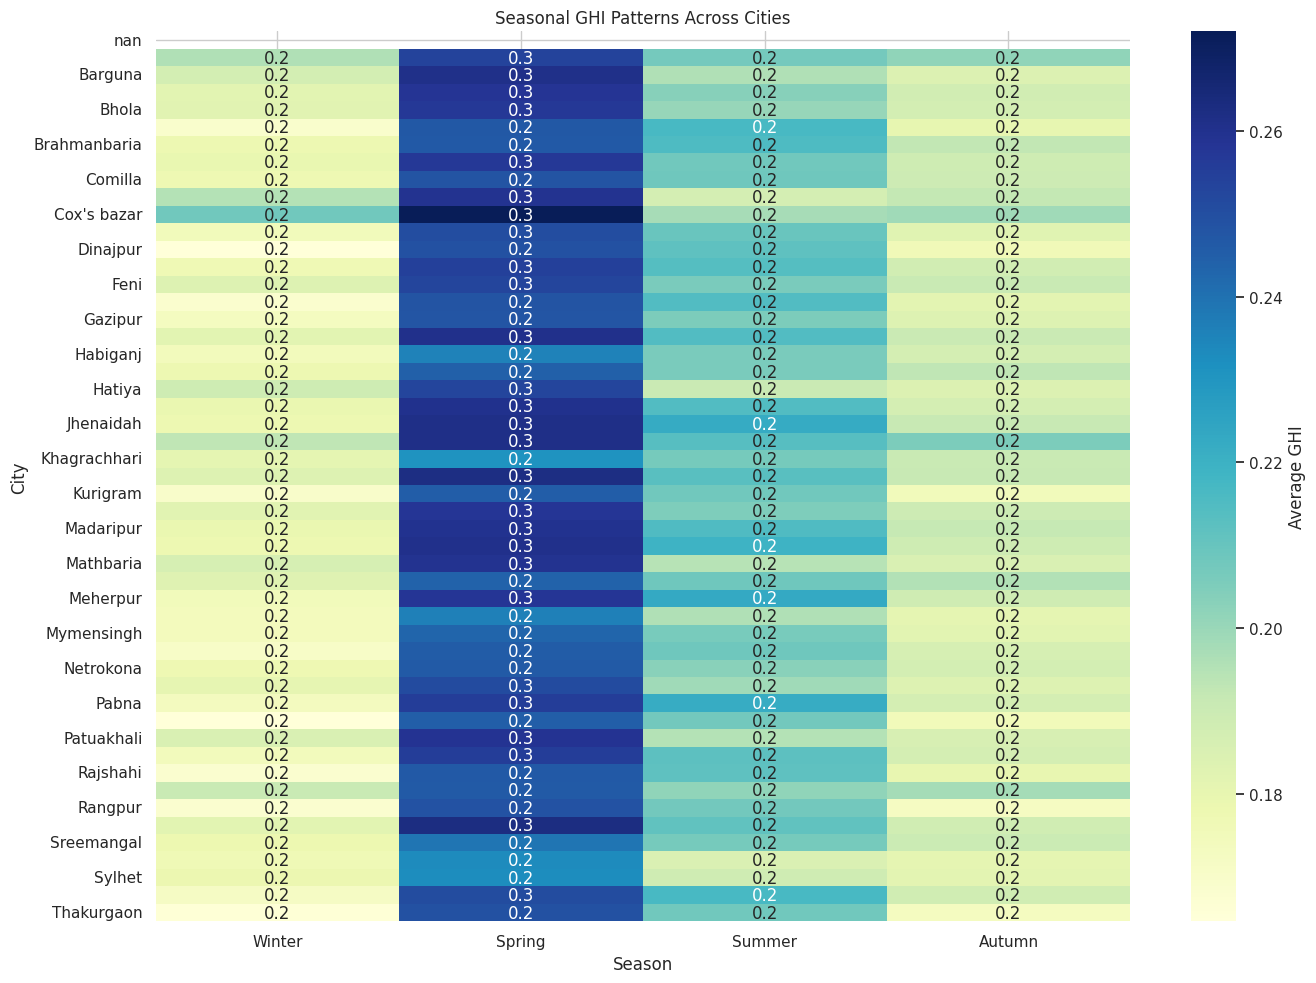

In [16]:
# Ensure all cities and seasons are included
all_cities = df['City'].unique()
all_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

# Create a complete index for the pivot table
complete_index = pd.MultiIndex.from_product([all_cities, all_seasons], names=['City', 'Season'])

# Group by City and Season, calculate average GHI
heatmap_data = df.groupby(['City', 'Season'])['GHI'].mean()

# Reindex to ensure all cities and seasons are present
heatmap_data = heatmap_data.reindex(complete_index).unstack()

# Sort seasons in order
heatmap_data = heatmap_data[season_order]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Average GHI'})
plt.title('Seasonal GHI Patterns Across Cities')
plt.xlabel('Season')
plt.ylabel('City')
plt.tight_layout()
plt.show()


<ipython-input-9-7dbc4801a864>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg_ghi.index, y=seasonal_avg_ghi.values, palette='coolwarm')


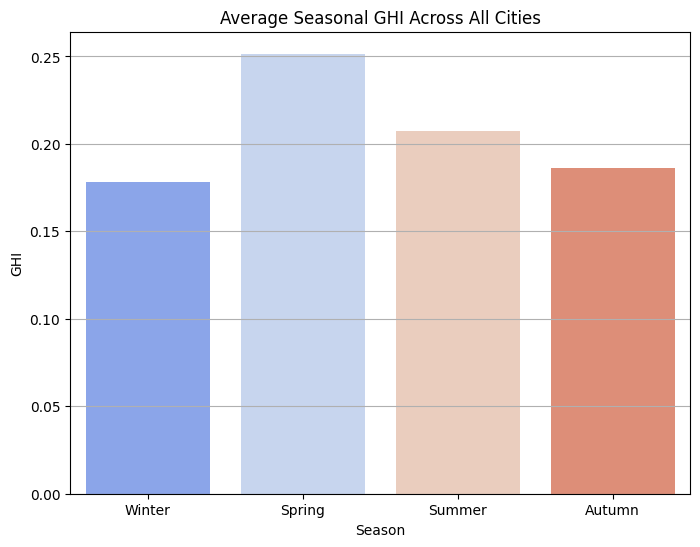

In [9]:
# Group data by Season and calculate average GHI across all cities
seasonal_avg_ghi = df.groupby('Season')['GHI'].mean()

# Plot the Seasonal GHI
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_avg_ghi = seasonal_avg_ghi.reindex(season_order)

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_avg_ghi.index, y=seasonal_avg_ghi.values, palette='coolwarm')
plt.title('Average Seasonal GHI Across All Cities')
plt.xlabel('Season')
plt.ylabel('GHI')
plt.grid(axis='y')
plt.show()


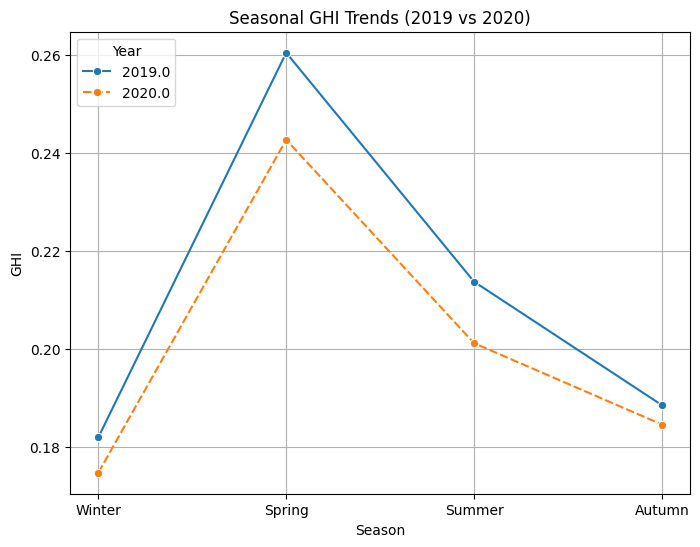

In [10]:
# Group by Season and Year, then calculate mean GHI
seasonal_yearly_ghi = df.groupby(['Season', 'Year'])['GHI'].mean().unstack()

# Plot the Seasonal Trends
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_yearly_ghi = seasonal_yearly_ghi.reindex(season_order)

plt.figure(figsize=(8, 6))
sns.lineplot(data=seasonal_yearly_ghi, marker='o')
plt.title('Seasonal GHI Trends (2019 vs 2020)')
plt.xlabel('Season')
plt.ylabel('GHI')
plt.grid()
plt.legend(title='Year', loc='upper left')
plt.show()


<Figure size 2000x2000 with 0 Axes>

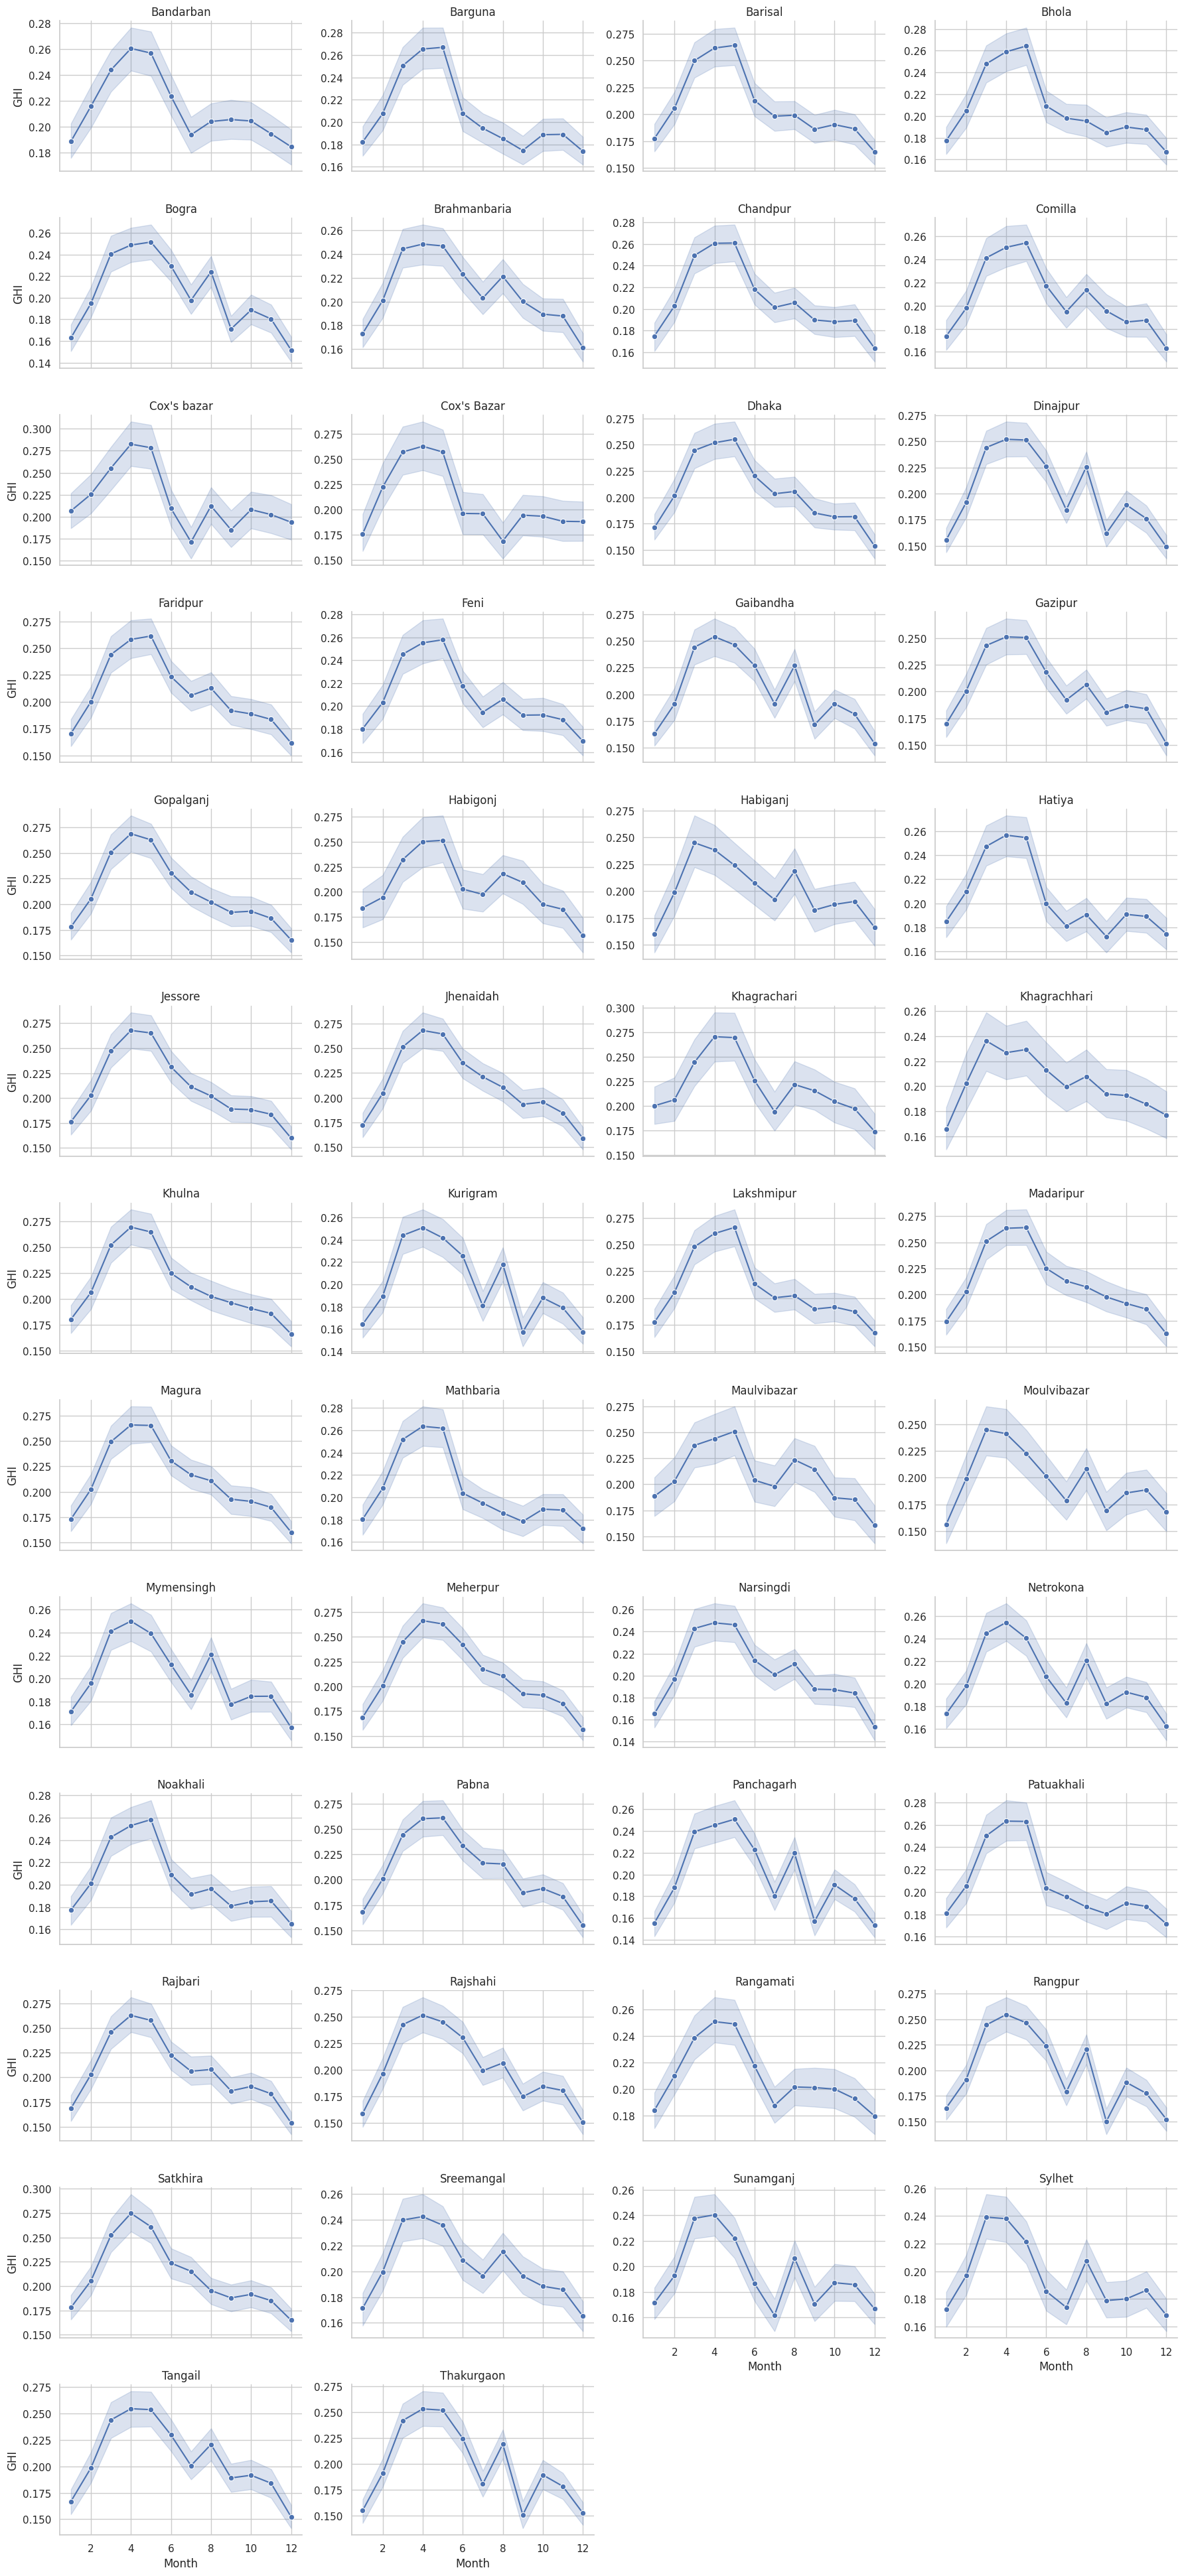

In [11]:
# Add Month Names for Better Interpretation
df['Month_Name'] = df['DateTime'].dt.month_name()

# Group by City and Month
city_monthly_ghi = df.groupby(['City', 'Month_Name'])['GHI'].mean().unstack()

# Sort months by order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
city_monthly_ghi = city_monthly_ghi[month_order]

# Faceted Line Plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
g = sns.FacetGrid(df, col="City", col_wrap=4, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'Month', 'GHI', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Month', 'GHI')
plt.show()


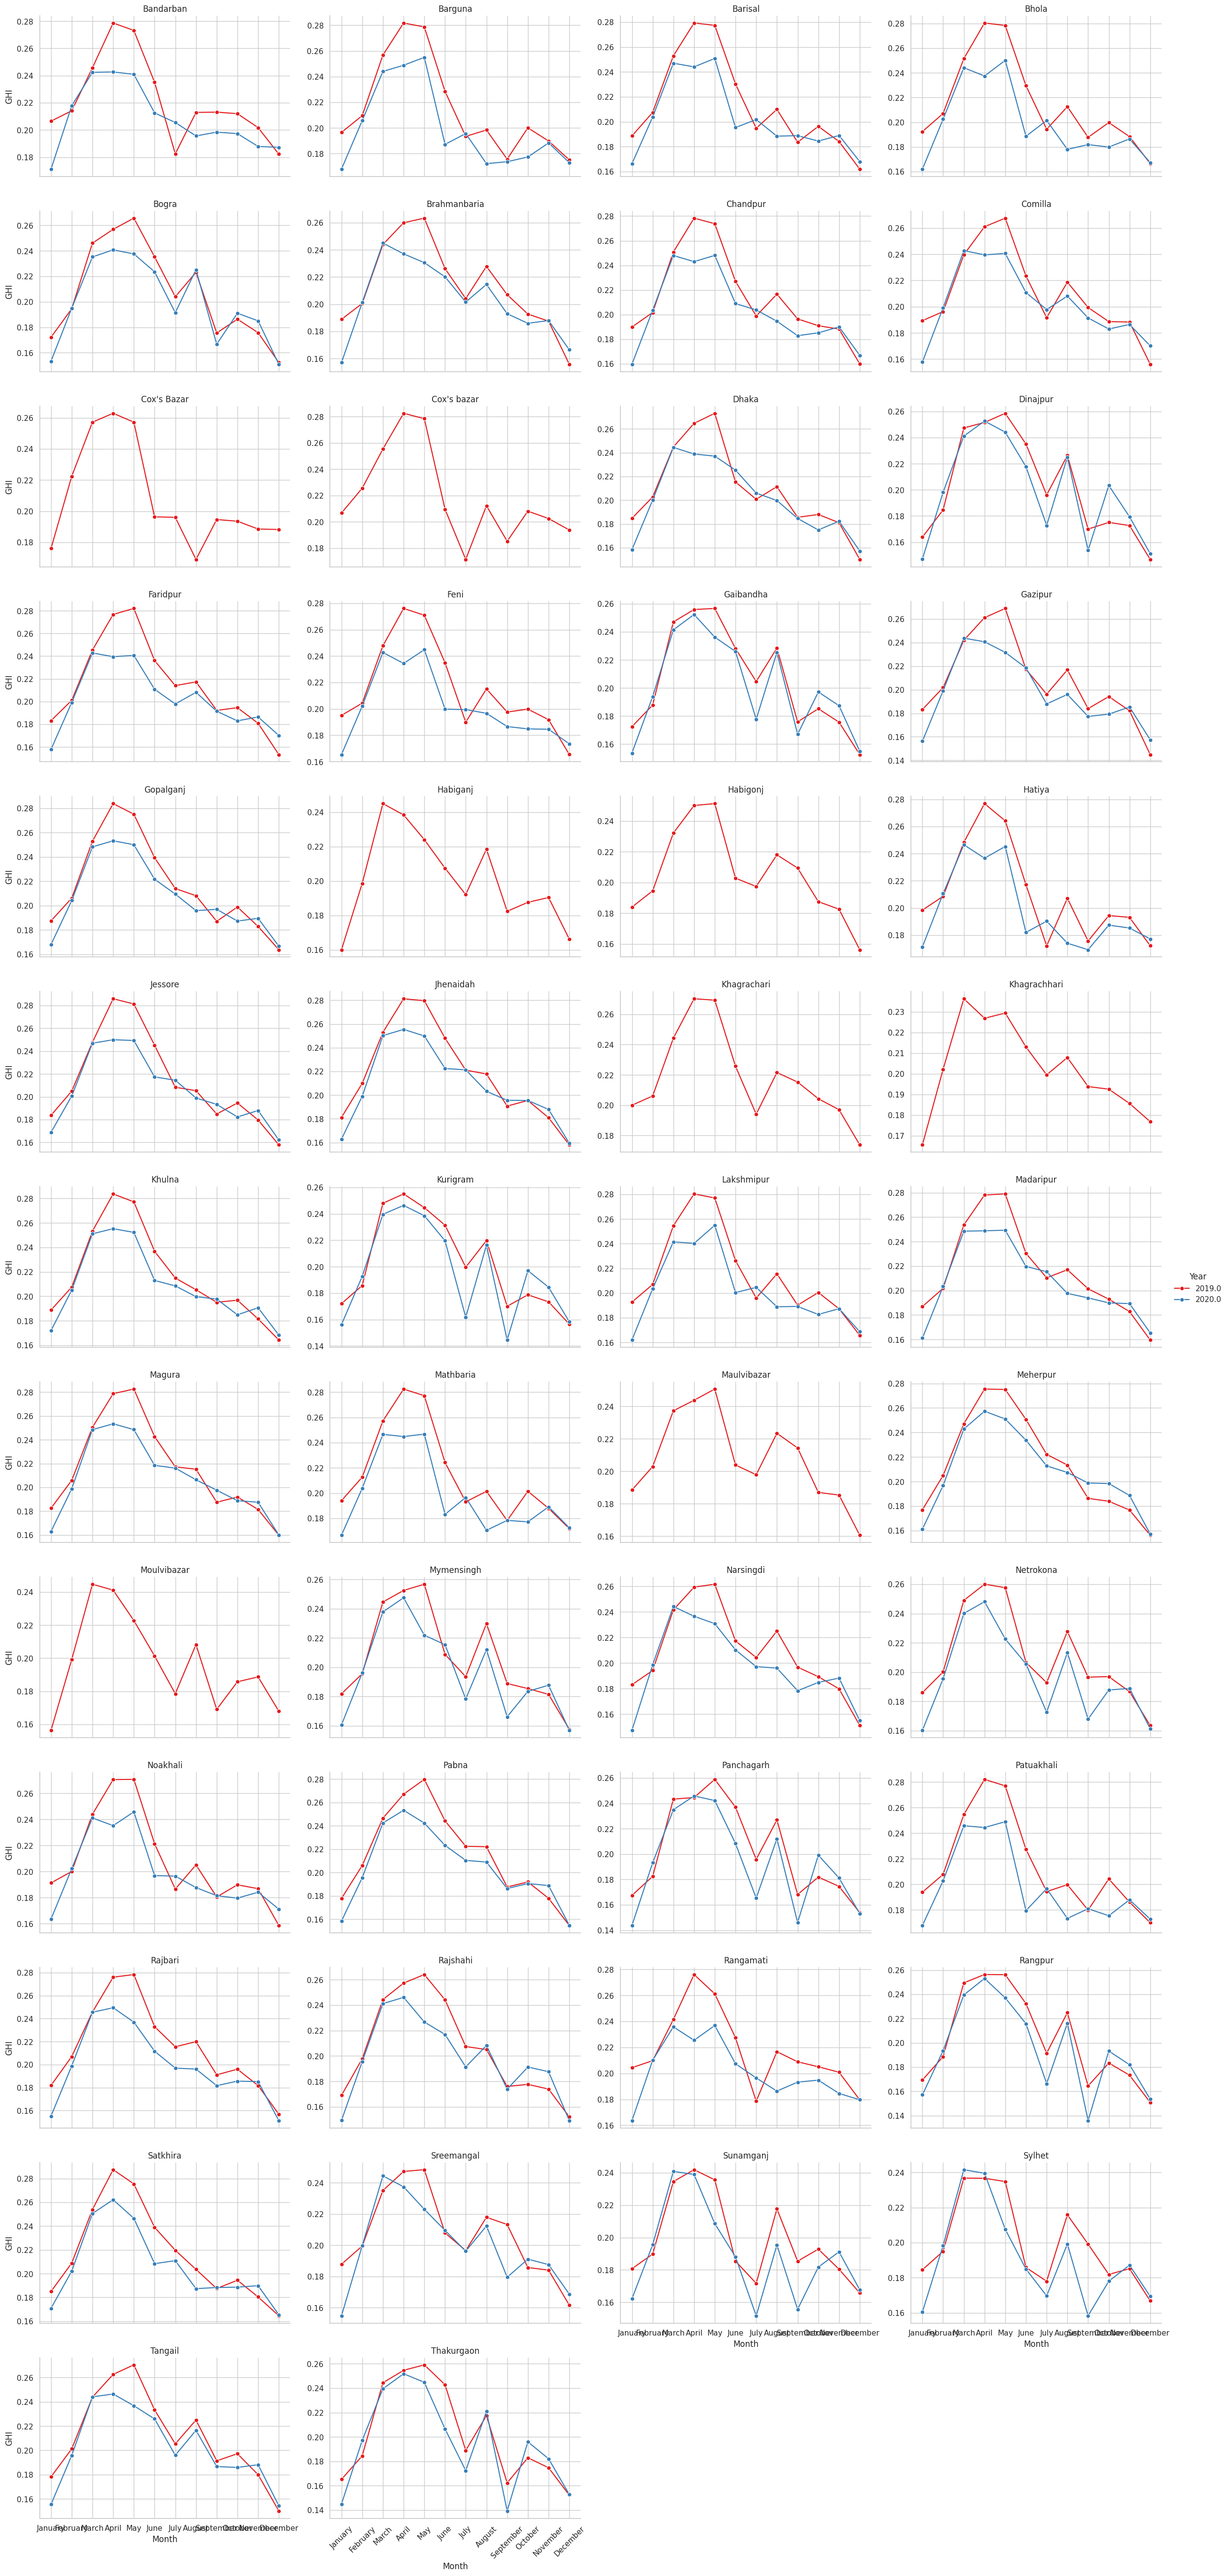

In [13]:
# Add Month Names for Better Interpretation
df['Month_Name'] = df['DateTime'].dt.month_name()

# Add a Year column
df['Year'] = df['DateTime'].dt.year

# Group by City, Month, and Year, then calculate average GHI
city_monthly_ghi = df.groupby(['City', 'Month_Name', 'Year'])['GHI'].mean().unstack()

# Sort months by order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
city_monthly_ghi = city_monthly_ghi.reindex(month_order, level=1)

# Melt the DataFrame for better plotting (long format)
df_melted = df.groupby(['City', 'Year', 'Month_Name'])['GHI'].mean().reset_index()
df_melted['Month_Name'] = pd.Categorical(df_melted['Month_Name'], categories=month_order, ordered=True)

# Faceted Line Plots
sns.set(style="whitegrid")
g = sns.FacetGrid(df_melted, col="City", col_wrap=4, height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'Month_Name', 'GHI', 'Year', marker='o', palette='Set1')
g.set_titles('{col_name}')
g.set_axis_labels('Month', 'GHI')
g.add_legend(title='Year')
plt.xticks(rotation=45)
plt.show()
